In [3]:
# We start with an easy linear regression model (one variable)
# E(Test Score | Class Size) = B0 + B1 * ClassSize
# For any given district the imperfect relationsship between the class size and test score can be written as;
# TestScore = B0 + B1 * ClassSize + error
# B0 is intercept, B1 is the slope

# This is how you can make Python read the CSV files - such as caschool data
# Please make sure the caschool.csv file is in the same directory as your jupyter lab otherwise it won't work.
# firstly import the needed library
import pandas as pd
data = pd.read_csv('caschool.csv')

# After letting Python read the file, we can print out very similar version of the Table 4.1 from S&W
# Summary of the Distrubution of Student-Teacher Ratios and Fifth-Grade Test Scores for 420 K-8 Districts in California in 1999
data[['str', 'testscr']].describe()

,str,testscr
count,420.000000,420.000000
mean,19.640425,654.156548
std,1.891812,19.053348
min,14.000000,605.550049
25%,18.582360,640.049988
50%,19.723208,654.449982
75%,20.871815,666.662506
max,25.799999,706.750000


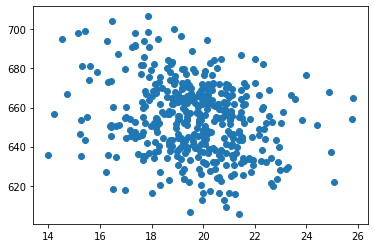

In [7]:
# Visually seeing the Data
# Figure 4.2 Scatterplot of Test Score vs Student-Teacher Ratio (California School District Data)
import matplotlib.pyplot as plt
plt.plot(data.str, data.testscr, 'o')

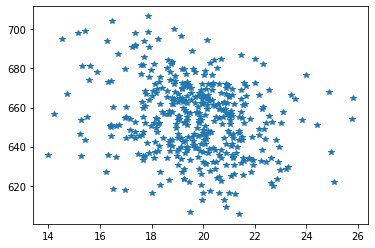

In [10]:
# If you want to see the data points as star:
plt.plot(data.str, data.testscr, '*')

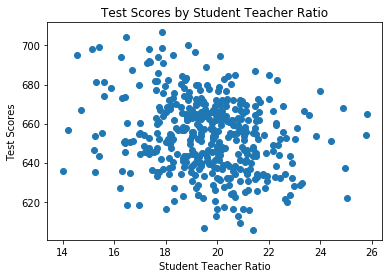

In [11]:
# To put titles on X and Y coordinates:
# Note all three of the graphs are identical in terms of data points.
plt.scatter(data.str, data.testscr)

plt.title('Test Scores by Student Teacher Ratio')
plt.xlabel('Student Teacher Ratio')
plt.ylabel('Test Scores')

plt.show()

In [12]:
# For the ordinary least Square estimator, I suggest you looking at Excel Layout in Python file.

In [14]:
# Finally we are actually going to be doing some OLS with the help of Python libraries
# We are going to need a library for OLS calculation
import statsmodels.api as sm

# This is our X variable which is Student Teacher Ratio
x = data['str']

# This is our Y variable which is Test Score
y = data['testscr']

# We add the constant
x = sm.add_constant(x)

# This is the part that we create our model
model = sm.OLS(y, x).fit()

# This part does the prediction
predictions = model.predict(x)

# Shows us the output of the regression
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                testscr   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     22.58
Date:                Fri, 24 Jul 2020   Prob (F-statistic):           2.78e-06
Time:                        16:46:48   Log-Likelihood:                -1822.2
No. Observations:                 420   AIC:                             3648.
Df Residuals:                     418   BIC:                             3657.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        698.9330      9.467     73.825      0.000     680.323     717.543
str           -2.2798      0.480     -4.751      0.000      -3.223      -1.337
==============================================================================
Omnibus:                        5.390   Durbin-Watson:                   0.129
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.589
Skew:                          -0.012   Prob(JB):                        0.166
Kurtosis:                       2.548   Cond. No.                         207.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

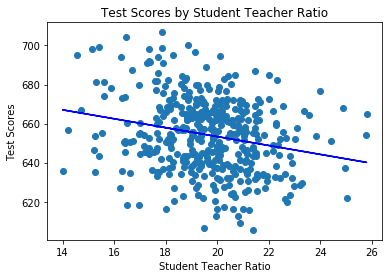

In [17]:
# Now let's show what we have done so far on a graph
# This function will show the scatter plot and the line that we just predicted with OLS
# We firstly import numpy library for some calculations
import numpy as np

def line(x,y):
    
    # Fit a line in a scatter plot based on the slope and intercept we calculated
    # Also the line's colour will be blue but can be changed if desired by changing the 'b' part of the code
    # Second line of the code will start from the intercept and then multiply the intercept in every increment 
    
    slope, intercept = np.polyfit(x, y, 1)
    line_values = [slope * i + intercept for i in x]
    plt.plot(x, line_values, 'b')
    

plt.scatter(data.str, data.testscr)

plt.title('Test Scores by Student Teacher Ratio')
plt.xlabel('Student Teacher Ratio')
plt.ylabel('Test Scores')

line(data.str, data.testscr)

plt.show()

In [18]:
# In the next pages of the S&W, it is talking about formulas that I mentioned already in the Excel Layout
# Hence, if you're interested, you can check that out

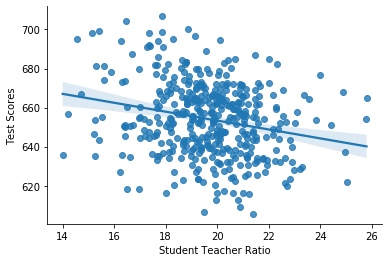

In [22]:
# I want to add this piece of code to give a better understanding about the line of the OLS
# This code shows 95% Confidence Interval of the Regression Estimate
# Also as you can see this is another (arguably easier) way of creating a line to your scatter plot

# Firstly import seaborn library
import seaborn as sns

# seaborn's regplot library automatically takes 95% Confidence Interval by default so we do not need to write 
# any code to specify 95% Confidence Interval
# We also attach whatever X and Y coordinates values to use.
sns.regplot(x='str', y='testscr', data = data)

# We put titles on both coordinates
plt.xlabel('Student Teacher Ratio')
plt.ylabel('Test Scores')
sns.despine()

# Print out the output
plt.show()

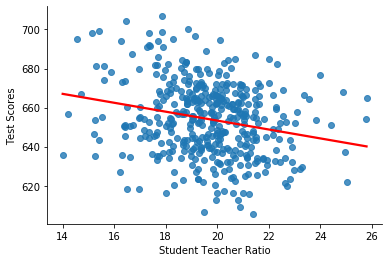

In [25]:
# As I mentioned seaborn takes 95% CI by default so if we simply want to create a line, this is what we do
# We say False to the ci
# Also to change the colour of the line we write line_kws = {'color':'red'}
sns.regplot(x='str', y='testscr', data = data, ci=False, line_kws = {'color':'red'})

# We put titles on both coordinates
plt.xlabel('Student Teacher Ratio')
plt.ylabel('Test Scores')
sns.despine()

# Print out the output
plt.show()

In [26]:
# Now let's go to the Practice questions

In [32]:
#1
#a
TestScore = 520.4 - (5.82*22)
print("Regression's prediction for that classroom's average test score: {:.2f}".format(TestScore))
#b
Change = (-5.82 * 23) - (-5.82 * 19)
print('The predicted change: {:.2f}'.format(Change))
#c
SampleAverage = 520.4 - (5.82 * 21.4)
print("The sample average of the test scores across the 100 classrooms: {:.2f}".format(SampleAverage))
#d
import math
N = 100
SSR = (N-2) * math.pow(11.5, 2)
TSS = SSR / (1 - 0.08)
SampleStandardDeviation = math.sqrt(TSS / (N - 1))
print("The Sample Standard Deviation of the test scores across the 100 classrooms: {:.2f}".format(SampleStandardDeviation))

Regression's prediction for that classroom's average test score: 392.36
The predicted change: -23.28
The sample average of the test scores across the 100 classrooms: 395.85
The Sample Standard Deviation of the test scores across the 100 classrooms: 11.93


In [34]:
#2
#a
N = 200
WeightPrediction1 = -99.41 + 3.94 * 70
WeightPrediction2 = -99.41 + 3.94 * 65
WeightPrediction3 = -99.41 + 3.94 * 74
print("The weight predictions for 70, 65 and 74 are {0:.2f}, {1:.2f} and {2:.2f} respectively".format(WeightPrediction1, WeightPrediction2, WeightPrediction3))
#b
print("Regression prediction for the increase in this man's weight {:.2f}".format(3.94 * 1.5))
#c
# Unneccessary question - skipped

The weight predictions for 70, 65 and 74 are 176.39, 156.69 and 192.15 respectively
Regression prediction for the increase in this man's weight 5.91


In [36]:
#3
# A, B and C are explanation questions so they're skipped
#d
print("Regression prediction for 25 and 45 year-old worker: {0:.2f} and {1:.2f}".format(696.7+9.6*25, 696.7+9.6*45))
# skipped to g
print("Average value of AWE in the sample is {:.2f}".format(696.7 + 9.6 * 41.6))

Regression prediction for 25 and 45 year-old worker: 936.70 and 1128.70
Average value of AWE in the sample is 1096.06


In [37]:
#4
# A and B is skipped to C
WalMart = 2.0 + 0.1*3.3
CocaCola = 2.0 + 0.6*3.3
Verizon = 2.0 + 0.7*3.3
Google = 2.0 + 1*3.3
Boeing = 2.0 + 1.3*3.3
BankofAmerica = 2.0 + 1.7*3.3
print("Predicted returns are: {0:.2f}, {1:.2f}, {2:.2f}, {3:.2f}, {4:.2f} and {5:.2f}".format(WalMart,CocaCola,Verizon,Google,Boeing,BankofAmerica))

Predicted returns are: 2.33, 3.98, 4.31, 5.30, 6.29 and 7.61


In [ ]:
# Rest of the questions are either asking explanations or too theoretical to put into Python 